# DATA 601 Final Project
# Severe Thunderstorm Climatology vs Sunspot Number 2019-2020
## Python weather analysis application that compares the occurrence of severe thunderstorm activity occurring over the continental Unites States to daily international sunspot number measurements.

## Build and train linear regression model: scatterplot of total sunspot number vs storm report number; calculate correlation and explained variance scores to assess model performance.

    Unnamed: 0       Period  Total Sunspot No.  Storm Report No.  \
0            0   11/1-15/19                 14                56   
1            1  11/16-30/19                  0                34   
2            2   12/1-15/19                  0                10   
3            3  12/16-31/19                 47                33   
4            4    1/1-15/20                 91               120   
5            5   1/16-31/20                101                14   
6            6    2/1-14/20                  6               196   
7            7   2/15-29/20                  0                38   
8            8    3/1-15/20                 29                80   
9            9   3/16-31/20                 17                71   
10          10    4/1-15/20                 52               334   
11          11   4/16-30/20                104               586   

    Mean Wind (mph)  Peak Wind (mph)  
0         46.142857               76  
1         55.176471               75 

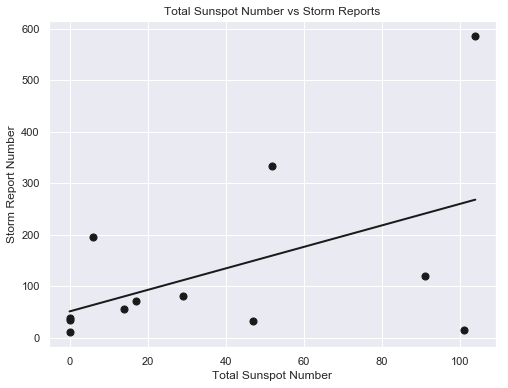

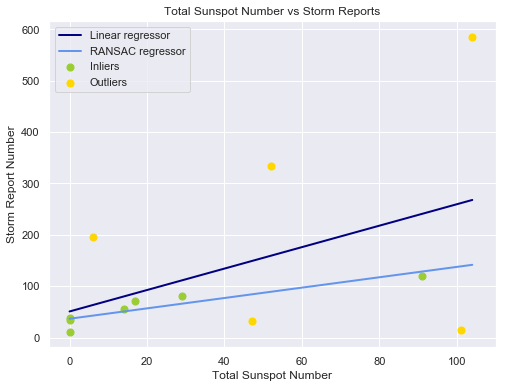

Coefficient of determination: 0.17 (Best possible score is 1.0)
Correlation Coefficient: 0.41 (Best possible score is 1.0)
Explained Variance = 0.23 (Best possible score is 1.0)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score

solar_storm_df = pd.read_csv("data/solar_storm.csv") 
solar_storm_df = solar_storm_df.drop([12,13])
print(solar_storm_df) 

y = solar_storm_df['Storm Report No.']
x = solar_storm_df['Total Sunspot No.']

#Select linear regression model for this study
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 104, 12)
yfit = model.predict(xfit[:, np.newaxis])
#Display scatterplot
fig = plt.figure(figsize=(8, 6))
plt.title('Total Sunspot Number vs Storm Reports')
plt.scatter(x, y, color='k',s=50)
plt.plot(xfit, yfit, linewidth=2.0, color='k');
plt.xlabel("Total Sunspot Number")
plt.ylabel("Storm Report Number")
plt.savefig("TotalSunspots_StormReports_wout.png",dpi=250,bbox_inches='tight')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

#Calculate coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f (Best possible score is 1.0)"
      % r2_score(y,yfit))

#Calculate correlation coefficient
R = np.sqrt(r2_score(y,yfit))
print("Correlation Coefficient: %.2f (Best possible score is 1.0)" %R)

#Calculate explained variance regression score: 
#Proportion to which a model accounts for the variation of a data set
V_score = explained_variance_score(y,yfit)
print("Explained Variance = %.2f (Best possible score is 1.0)" %V_score)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
xr = solar_storm_df['Total Sunspot No.'].to_numpy()
xr = xr.reshape(-1, 1)
yr = solar_storm_df['Storm Report No.']
ransac.fit(xr, yr)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
xfitr = np.linspace(0, 104, 12)[:, np.newaxis]
yfit_ransac = ransac.predict(xfitr)
# Compare estimated coefficients
print("Estimated coefficients (linear regression, RANSAC):")
print(model.coef_, ransac.estimator_.coef_)
#Display scatterplot
fig = plt.figure(figsize=(8, 6))
plt.title('Total Sunspot Number vs Storm Reports')
lw = 2
plt.scatter(x[inlier_mask], y[inlier_mask], color='yellowgreen', 
            label='Inliers', s=50)
plt.scatter(x[outlier_mask], y[outlier_mask], color='gold', 
            label='Outliers', s=50)
plt.plot(xfitr, yfit, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(xfitr, yfit_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='upper left')

plt.xlabel("Total Sunspot Number")
plt.ylabel("Storm Report Number")
plt.savefig("TotalSunspots_StormReports_ransac_wout.png",dpi=250,bbox_inches='tight')
plt.show()

#Calculate coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f (Best possible score is 1.0)"
      % r2_score(yr,yfit_ransac))

#Calculate correlation coefficient
R = np.sqrt(r2_score(yr,yfit_ransac))
print("Correlation Coefficient: %.2f (Best possible score is 1.0)" %R)

#Calculate explained variance regression score: 
#Proportion to which a model accounts for the variation of a data set
V_score = explained_variance_score(yr,yfit_ransac)
print("Explained Variance = %.2f (Best possible score is 1.0)" %V_score)


## Build and train linear regression model after removal of an outlier data point: scatterplot of mean sunspot number vs storm report number; calculate correlation and explained variance scores to assess model performance.

    Unnamed: 0       Period  Total Sunspot No.  Storm Report No.  \
0            0   11/1-15/19                 14                56   
1            1  11/16-30/19                  0                34   
2            2   12/1-15/19                  0                10   
3            3  12/16-31/19                 47                33   
4            4    1/1-15/20                 91               120   
6            6    2/1-14/20                  6               196   
7            7   2/15-29/20                  0                38   
8            8    3/1-15/20                 29                80   
9            9   3/16-31/20                 17                71   
10          10    4/1-15/20                 52               334   
11          11   4/16-30/20                104               586   

    Mean Wind (mph)  Peak Wind (mph)  
0         46.142857               76  
1         55.176471               75  
2         33.700000               44  
3         48.878788        

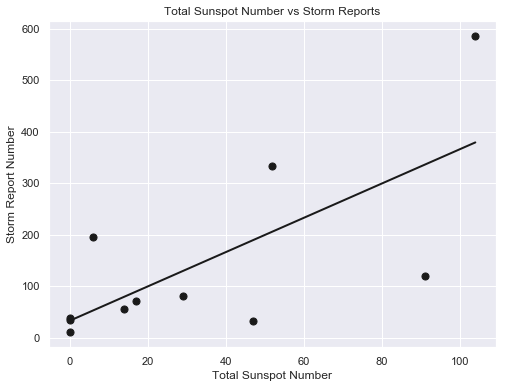

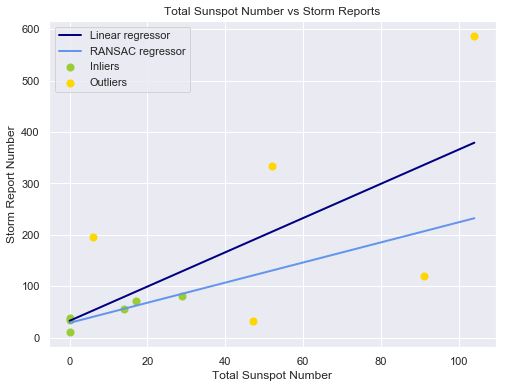

Coefficient of determination: 0.39 (Best possible score is 1.0)
Correlation Coefficient: 0.62 (Best possible score is 1.0)
Explained Variance = 0.39 (Best possible score is 1.0)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score

solar_storm_df = pd.read_csv("data/solar_storm.csv") 
solar_storm_df = solar_storm_df.drop([5,12,13])
print(solar_storm_df) 

y = solar_storm_df['Storm Report No.']
x = solar_storm_df['Total Sunspot No.']

#Select linear regression model for this study
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 104, 11)
yfit = model.predict(xfit[:, np.newaxis])
#Display scatterplot
fig = plt.figure(figsize=(8, 6))
plt.title('Total Sunspot Number vs Storm Reports')
plt.scatter(x, y, color='k',s=50)
plt.plot(xfit, yfit, linewidth=2.0, color='k');
plt.xlabel("Total Sunspot Number")
plt.ylabel("Storm Report Number")
plt.savefig("TotalSunspots_StormReports.png",dpi=250,bbox_inches='tight')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

#Calculate coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f (Best possible score is 1.0)"
      % r2_score(y,yfit))

#Calculate correlation coefficient
R = np.sqrt(r2_score(y,yfit))
print("Correlation Coefficient: %.2f (Best possible score is 1.0)" %R)

#Calculate explained variance regression score: 
#Proportion to which a model accounts for the variation of a data set
V_score = explained_variance_score(y,yfit)
print("Explained Variance = %.2f (Best possible score is 1.0)" %V_score)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
xr = solar_storm_df['Total Sunspot No.'].to_numpy()
xr = xr.reshape(-1, 1)
yr = solar_storm_df['Storm Report No.']
ransac.fit(xr, yr)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
xfitr = np.linspace(0, 104, 11)[:, np.newaxis]
yfit_ransac = ransac.predict(xfitr)
# Compare estimated coefficients
print("Estimated coefficients (linear regression, RANSAC):")
print(model.coef_, ransac.estimator_.coef_)
#Display scatterplot
fig = plt.figure(figsize=(8, 6))
plt.title('Total Sunspot Number vs Storm Reports')
lw = 2
plt.scatter(x[inlier_mask], y[inlier_mask], color='yellowgreen', 
            label='Inliers', s=50)
plt.scatter(x[outlier_mask], y[outlier_mask], color='gold', 
            label='Outliers', s=50)
plt.plot(xfitr, yfit, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(xfitr, yfit_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='upper left')

plt.xlabel("Total Sunspot Number")
plt.ylabel("Storm Report Number")
plt.savefig("TotalSunspots_StormReports_ransac.png",dpi=250,bbox_inches='tight')
plt.show()

#Calculate coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f (Best possible score is 1.0)"
      % r2_score(yr,yfit_ransac))

#Calculate correlation coefficient
R = np.sqrt(r2_score(yr,yfit_ransac))
print("Correlation Coefficient: %.2f (Best possible score is 1.0)" %R)

#Calculate explained variance regression score: 
#Proportion to which a model accounts for the variation of a data set
V_score = explained_variance_score(yr,yfit_ransac)
print("Explained Variance = %.2f (Best possible score is 1.0)" %V_score)


    Unnamed: 0       Period  Total Sunspot No.  Storm Report No.  \
0            0   11/1-15/19                 14                56   
1            1  11/16-30/19                  0                34   
2            2   12/1-15/19                  0                10   
3            3  12/16-31/19                 47                33   
4            4    1/1-15/20                 91               120   
6            6    2/1-14/20                  6               196   
7            7   2/15-29/20                  0                38   
8            8    3/1-15/20                 29                80   
9            9   3/16-31/20                 17                71   
10          10    4/1-15/20                 52               334   
11          11   4/16-30/20                104               586   

    Mean Wind (mph)  Peak Wind (mph)  
0         46.142857               76  
1         55.176471               75  
2         33.700000               44  
3         48.878788        

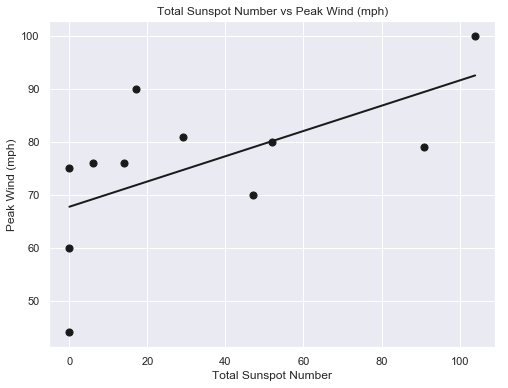

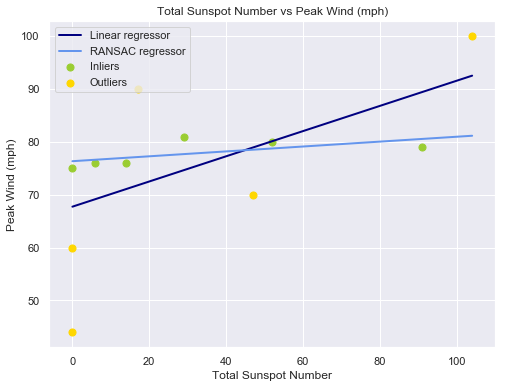

Coefficient of determination: 0.06 (Best possible score is 1.0)
Correlation Coefficient: 0.25 (Best possible score is 1.0)
Explained Variance = 0.11 (Best possible score is 1.0)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score

solar_storm_df = pd.read_csv("data/solar_storm.csv") 
solar_storm_df = solar_storm_df.drop([5,12,13])
print(solar_storm_df) 

y = solar_storm_df['Peak Wind (mph)']
x = solar_storm_df['Total Sunspot No.']

#Select linear regression model for this study
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 104, 11)
yfit = model.predict(xfit[:, np.newaxis])
#Display scatterplot
fig = plt.figure(figsize=(8, 6))
plt.title('Total Sunspot Number vs Peak Wind (mph)')
plt.scatter(x, y, color='k',s=50)
plt.plot(xfit, yfit, linewidth=2.0, color='k');
plt.xlabel("Total Sunspot Number")
plt.ylabel("Peak Wind (mph)")
plt.savefig("TotalSunspots_PeakWind.png",dpi=250,bbox_inches='tight')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

#Calculate coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f (Best possible score is 1.0)"
      % r2_score(y,yfit))

#Calculate correlation coefficient
R = np.sqrt(r2_score(y,yfit))
print("Correlation Coefficient: %.2f (Best possible score is 1.0)" %R)

#Calculate explained variance regression score: 
#Proportion to which a model accounts for the variation of a data set
V_score = explained_variance_score(y,yfit)
print("Explained Variance = %.2f (Best possible score is 1.0)" %V_score)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
xr = solar_storm_df['Total Sunspot No.'].to_numpy()
xr = xr.reshape(-1, 1)
yr = solar_storm_df['Peak Wind (mph)']
ransac.fit(xr, yr)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
xfitr = np.linspace(0, 104, 11)[:, np.newaxis]
yfit_ransac = ransac.predict(xfitr)
# Compare estimated coefficients
print("Estimated coefficients (linear regression, RANSAC):")
print(model.coef_, ransac.estimator_.coef_)
#Display scatterplot
fig = plt.figure(figsize=(8, 6))
plt.title('Total Sunspot Number vs Peak Wind (mph)')
lw = 2
plt.scatter(x[inlier_mask], y[inlier_mask], color='yellowgreen', 
            label='Inliers', s=50)
plt.scatter(x[outlier_mask], y[outlier_mask], color='gold', 
            label='Outliers', s=50)
plt.plot(xfitr, yfit, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(xfitr, yfit_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='upper left')

plt.xlabel("Total Sunspot Number")
plt.ylabel("Peak Wind (mph)")
plt.savefig("TotalSunspots_PeakWind_ransac.png",dpi=250,bbox_inches='tight')
plt.show()

#Calculate coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f (Best possible score is 1.0)"
      % r2_score(yr,yfit_ransac))

#Calculate correlation coefficient
R = np.sqrt(r2_score(yr,yfit_ransac))
print("Correlation Coefficient: %.2f (Best possible score is 1.0)" %R)

#Calculate explained variance regression score: 
#Proportion to which a model accounts for the variation of a data set
V_score = explained_variance_score(yr,yfit_ransac)
print("Explained Variance = %.2f (Best possible score is 1.0)" %V_score)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
PCA components: 
[[ 0.14986235  0.98870687]
 [ 0.98870687 -0.14986235]]
PCA explained variance: 
[31232.79584164   672.67688563]
PCA explained variance ratio: 
[0.97891657 0.02108343]
('Length = ', 31232.795841639792)
('v = ', array([ 79.45463391, 524.19664604]))
('PCA mean = ', array([ 32.72727273, 141.63636364]))
('Length = ', 672.6768856329384)
('v = ', array([ 76.92934932, -11.66049675]))
('PCA mean = ', array([ 32.72727273, 141.63636364]))


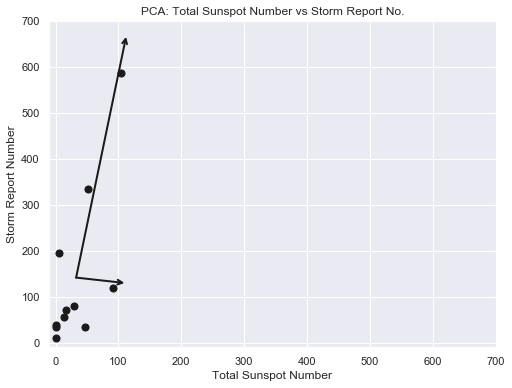

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
solar_storm_df = pd.read_csv("data/solar_storm.csv") 
solar_storm_df = solar_storm_df.drop([5,12,13])
TS = solar_storm_df['Total Sunspot No.'].to_numpy()
SR = solar_storm_df['Storm Report No.'].to_numpy()
SS = np.column_stack((TS,SR))

pca.fit(SS)
print(pca)
print("PCA components: ")
print(pca.components_)
print("PCA explained variance: ")
print(pca.explained_variance_)
print("PCA explained variance ratio: ")
print(pca.explained_variance_ratio_)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
fig = plt.figure(figsize=(8, 6))
plt.title('PCA: Total Sunspot Number vs Storm Report No.')
# plot data
plt.scatter(SS[:, 0], SS[:, 1], color='k',s=50)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print("Length = ", length)
    v = vector * 3 * np.sqrt(length)
    print("v = ", v)
    print("PCA mean = ", pca.mean_)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis([-10, 700, -10, 700])
plt.xlabel("Total Sunspot Number")
plt.ylabel("Storm Report Number")
plt.savefig("TotalSunspots_StormReports_pca.png",dpi=250,bbox_inches='tight')
plt.show()

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
PCA components: 
[[ 0.96701883  0.25470491]
 [ 0.25470491 -0.96701883]]
PCA explained variance: 
[1444.40025143  128.29065766]
PCA explained variance ratio: 
[0.91842602 0.08157398]
('Length = ', 1444.4002514297867)
('v = ', array([110.25542346,  29.04038327]))
('PCA mean = ', array([32.72727273, 75.54545455]))
('Length = ', 128.29065766112262)
('v = ', array([  8.65478098, -32.85895137]))
('PCA mean = ', array([32.72727273, 75.54545455]))


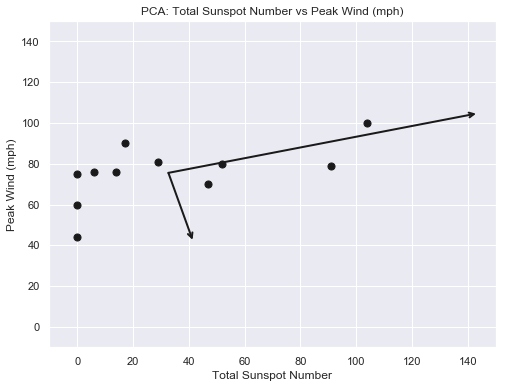

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
solar_storm_df = pd.read_csv("data/solar_storm.csv") 
solar_storm_df = solar_storm_df.drop([5,12,13])
TS = solar_storm_df['Total Sunspot No.'].to_numpy()
PW = solar_storm_df['Peak Wind (mph)'].to_numpy()
SS = np.column_stack((TS,PW))

pca.fit(SS)
print(pca)
print("PCA components: ")
print(pca.components_)
print("PCA explained variance: ")
print(pca.explained_variance_)
print("PCA explained variance ratio: ")
print(pca.explained_variance_ratio_)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
fig = plt.figure(figsize=(8, 6))
plt.title('PCA: Total Sunspot Number vs Peak Wind (mph)')
# plot data
plt.scatter(SS[:, 0], SS[:, 1], color='k',s=50)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print("Length = ", length)
    v = vector * 3 * np.sqrt(length)
    print("v = ", v)
    print("PCA mean = ", pca.mean_)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis([-10, 150, -10, 150])
plt.xlabel("Total Sunspot Number")
plt.ylabel("Peak Wind (mph)")
plt.savefig("TotalSunspots_PeakWind_pca.png",dpi=250,bbox_inches='tight')
plt.show()